In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image as pImg

### Starting off by importing the data.

In [39]:
base_df = pd.read_csv('ESPORTS_DATA.csv')

### Removing incomplete / non-MSI entries

In [40]:
base_df = base_df[(base_df.league == 'MSI') & (base_df.datacompleteness == 'complete')]

### Removing unnecesarry columns.

In [41]:
base_df = base_df.drop(columns=['gameid','datacompleteness','url','league','year','split','playoffs','patch','participantid','playerid','teamid','opp_elementaldrakes','opp_elders','opp_heralds','opp_barons','opp_towers','opp_turretplates','opp_inhibitors','opp_killsat10','opp_assistsat10','opp_deathsat10','opp_goldat15','opp_xpat15','opp_csat15','opp_killsat15','opp_assistsat15','opp_deathsat15'])

### Removing the team entries

In [42]:
df = base_df[base_df.position != 'team']

### Side win rate

In [43]:
b_wins = df[(df.side == 'Blue') & (df.result == 1)]
r_wins = df[(df.side == 'Red') & (df.result == 1)]

### Top picked champs

In [44]:
filtered_by_role = df[df.position == 'bot']
top_picked_df = filtered_by_role[['champion', 'result']].groupby('champion').count().sort_values(by=['result'], ascending = False)
most_picked = top_picked_df.squeeze().head().sort_values()

### Top banned champs

In [45]:
top_df = df[df.position == 'top']
bans = pd.concat([top_df['ban1'], top_df['ban2'], top_df['ban3'], top_df['ban4'], top_df['ban5']])
most_banned = bans.value_counts().head().sort_values()

# Per role pick rate

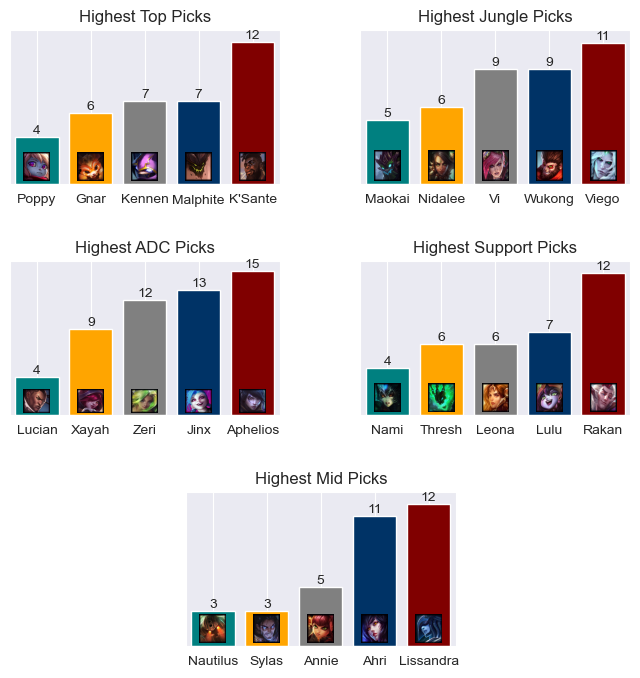

In [165]:
fig, axes = plt.subplots(3, 2, figsize = (8,8))

plt.subplots_adjust(hspace=0.5, wspace=0.3)
generate_bar_chart(get_top_pick('mid'), "Highest Mid Picks", ax=axes[2][0])
generate_bar_chart(get_top_pick('sup'), "Highest Support Picks", ax=axes[1][1])
generate_bar_chart(get_top_pick('bot'), "Highest ADC Picks", ax=axes[1][0])
generate_bar_chart(get_top_pick('jng'), "Highest Jungle Picks", ax=axes[0][1])
generate_bar_chart(get_top_pick('top'), "Highest Top Picks", ax=axes[0][0])
axes[2][1].axis('off')
axes[2][0].set_position([axes[2][0].get_position().x0 + 0.22, axes[2][0].get_position().y0, 
                         axes[2][0].get_position().width, axes[2][0].get_position().height])
axes[2][0].colspan=2


# Different champions per role

In [49]:
get_champions_per_role('jng')

14

# Multikill data

In [50]:
multikill_data = pd.DataFrame({
    'Type': ['Pentakill', 'Quadrakill', 'Triplekill', 'Doublekill'],
    'Count': [df['pentakills'].sum(), df['quadrakills'].sum(), df['triplekills'].sum(), df['doublekills'].sum()],
    'Per_game': [
        round(df['pentakills'].sum() / total_matches, 2),
        round(df['quadrakills'].sum() / total_matches, 2),
        round(df['triplekills'].sum() / total_matches, 2),
        round(df['doublekills'].sum() / total_matches, 2),
    ]
})

plt.barh(multikill_data.index.tolist(), multikill_data['Count'].values)
plt.yticks([])
plt.ylabel('Type')
plt.xlabel('Count')
plt.xlim(0, 130)
ct = 0
for i, v in enumerate(multikill_data['Count']):
    v = int(v)
    plt.text(v + 0.5, i, str(multikill_data['Type'][ct] + 's: ' + str(v)), color='black', fontweight='bold')
    ct+= 1
plt.show()

NameError: name 'total_matches' is not defined

# Total matches

In [51]:
total_matches = df[df.position == 'top'].shape[0] / 2

# Average game length

In [ ]:
df.gamelength.mean()

### Useful functions

In [181]:
def get_wr_by_champ(champ_name):
    filtered_df = df[df.champion == champ_name]
    return filtered_df[filtered_df.result == 1].shape[0] / filtered_df.shape[0] * 100

def get_br_by_champ(champ_name):
    top_df = df[df.position == 'top']
    bans = pd.concat([top_df['ban1'], top_df['ban2'], top_df['ban3'], top_df['ban4'], top_df['ban5']])
    ban_counts = bans.value_counts()
    return ban_counts[champ_name] / get_total_games_num()

def get_total_games_num():
    return df[df.position == 'top'].shape[0] / 2

def generate_bar_chart(data, title, position_inside=True, vertical=True, ax=None):
    new_pallete = sns.color_palette(["#008080", "#FFA500", "#808080", "#003366", "#800000"])
    sns.set_palette(new_pallete)
    sns.set_style('darkgrid')
    res_bar = None
    if ax is None:
        fig, ax = plt.subplots()
    if vertical:
        res_bar = ax.bar(data.index, data.values, color=new_pallete)
    else:
        res_bar = ax.barh(data.index, data.values, color=new_pallete)
    ax.set_title(title)
    ax.set_yticks(np.arange(0, max(data.values) + 1, 4))

    for i, v in enumerate(data.values):
        if vertical:
            ax.text(i, v, str(v), ha='center', va='bottom')
        else:
            ax.text(i, v, str(v), ha='left', va='bottom')

    for i, (label, value) in enumerate(data.items()):
        continue
        champ_img = pImg.open('ChampSquares/{}Square.png'.format(label))
        if position_inside:
            ax.imshow(champ_img, extent=[i-0.25, i+0.25, 0.25, 2.65], aspect='auto', zorder=2)
            ax.set_ylim(0, max(data.values) + 1)
        else:
            ax.imshow(champ_img, extent=[i-0.385, i+0.395, -4, 0], aspect='auto', zorder=2)
            ax.set_ylim(-4, max(data.values) + 1)
    ax.set_xlim(-0.5, data.shape[0] + 10)
    return res_bar

def get_top_pick(role = None):
    if role != None:
        filtered_by_role = df[df.position == role]
        top_picked_df = filtered_by_role[['champion', 'result']].groupby('champion').count().sort_values(by=['result'], ascending = False)
    else:
        top_picked_df = df[['champion', 'result']].groupby('champion').count().sort_values(by=['result'], ascending = False)
    most_picked = top_picked_df.squeeze().head().sort_values()
    return most_picked

def get_champions_per_role(role = None):
    if role != None:
        role_df = df[df.position == role]
        return role_df.groupby('champion').count().shape[0]
    return -1

In [ ]:
temp_df = df[df.position == 'top']
print(temp_df.firstbloodkill.sum())
temp_df = df[df.position == 'jng']
print(temp_df.firstbloodkill.sum())
temp_df = df[df.position == 'mid']
print(temp_df.firstbloodkill.sum())
temp_df = df[df.position == 'bot']
print(temp_df.firstbloodkill.sum())
temp_df = df[df.position == 'sup']
print(temp_df.firstbloodkill.sum())

# First tower win rate

In [ ]:
teams_df = base_df[base_df.position == 'team'][['teamname','firsttower','result']]
first_tower_wr = teams_df[(teams_df.firsttower == 1) & (teams_df.result == 1)].count() / total_matches
first_tower_wr

# First blood win rate

In [ ]:
teams_df = base_df[base_df.position == 'team'][['teamname','firstblood','result']]
first_blood_wr = teams_df[(teams_df.firstblood == 1) & (teams_df.result == 1)].count() / total_matches
first_blood_wr

In [ ]:
df.cspm.describe()

In [ ]:
fb_df = df[['playername','champion','firstbloodkill']][df['firstbloodkill'] > 0]
firstblood_per_player = fb_df.groupby('playername').sum('firstbloodkill').sort_values(by='firstbloodkill', ascending = False)
firstblood_per_champion = fb_df.groupby('champion').sum('firstbloodkill').sort_values(by='firstbloodkill', ascending = False)

firstblood_per_champion.head()
firstblood_per_player.head()

# Best performance gold graph

In [ ]:
peyz_df = df[['goldat10','goldat15']][df.goldat15 > 9900]
average_adc_df = df[['goldat10','goldat15']][df.position == 'bot'].mean()
average_player = df[['goldat10','goldat15']].mean()

row_to_plot = peyz_df.iloc[0]
row_to_plot_2 = average_adc_df.iloc[[0, 1]]
row_to_plot_3 = average_player.iloc[[0, 1]]


x_values = [10, 15]

y_values = [row_to_plot['goldat10'], row_to_plot['goldat15']]
y_values_2 = [row_to_plot_2.values[0], row_to_plot_2.values[1]]
y_values_3 = [row_to_plot_3.values[0], row_to_plot_3.values[1]]

plt.plot(x_values, y_values, marker='o', label='Peyz')
plt.plot(x_values, y_values_2, alpha=0.75, marker='o', label='Average ADC this MSI')
plt.plot(x_values, y_values_3, alpha=0.75, marker='o', label='Average across all roles this MSI')

plt.xlabel('Minutes')
plt.ylabel('Gold')
plt.title('Gold over time')
plt.legend()

for i, y in enumerate(y_values):
    plt.text(x_values[i], y, str(y), ha='center', va='bottom', fontsize=10)
for i, y in enumerate(y_values_2):
    plt.text(x_values[i], y, str(int(y)), ha='center', va='bottom', fontsize=10)
for i, y in enumerate(y_values_3):
    plt.text(x_values[i], y, str(int(y)), ha='center', va='bottom', fontsize=10)
plt.show()

## Best team analysis

In [184]:
teams_df = base_df[base_df.position == 'team']
gat10_teams = teams_df[['teamname','goldat10','gamelength', 'result']]
gat10_teams = gat10_teams.groupby('teamname').mean().sort_values(by=['goldat10'], ascending = False)
result_df = gat10_teams['goldat10'].copy()
game_length_teams = teams_df[['teamname','goldat10','gamelength', 'result']]
game_length_teams = game_length_teams[game_length_teams.result == 1]
game_length_teams = game_length_teams.groupby('teamname').mean().sort_values(by=['gamelength'], ascending = False)
game_length_result_df = game_length_teams['gamelength'].copy()
champ_picks_df = df[df.teamname == 'Bilibili Gaming'].groupby('champion').sum('result').sort_values(by=['result'], ascending = False)
champ_picks_df = champ_picks_df[['result']].head()
champ_picks_series = champ_picks_df['result']

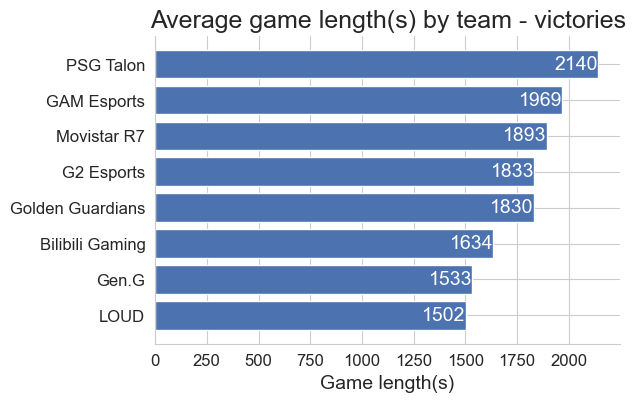

In [182]:
sns.set_style('whitegrid')
sns.set_palette('deep')

fig, ax = plt.subplots(figsize=(6, 4))

h_bar = ax.barh(game_length_result_df.index, game_length_result_df.values)

for i, v in enumerate(game_length_result_df.values):
    ax.text(v, i, str(int(v)), ha='right', va='center', color='w', fontsize=14)

ax.set_title('Average game length(s) by team - victories', fontsize=18)
ax.set_xlabel('Game length(s)', fontsize=14)

ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

ax.invert_yaxis()

sns.despine()

plt.show()

In [ ]:
bar = generate_bar_chart(gat10_teams['goldat10'], 'Gold at 10 per team')
bar.show()

<BarContainer object of 5 artists>

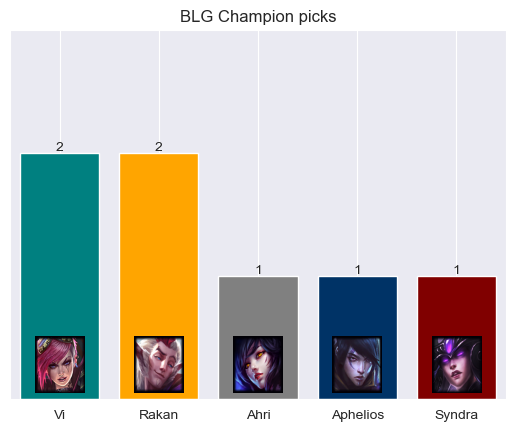

In [185]:
generate_bar_chart(champ_picks_series, 'BLG Champion picks')

## Teams gold at 10 and 15

In [197]:
gold_diff_df = teams_df[['teamname','goldat10','goldat15']].groupby('teamname').sum('goldat10')
gold_diff_df

,goldat10,goldat15
teamname,,
Bilibili Gaming,87730.0,144912.0
DetonatioN FocusMe,62768.0,95035.0
G2 Esports,134674.0,206840.0
GAM Esports,76965.0,124440.0
Gen.G,66975.0,108674.0
Golden Guardians,158307.0,257124.0
LOUD,88518.0,144463.0
Movistar R7,108966.0,168094.0
PSG Talon,144088.0,232002.0


C:\Users\Vlad\AppData\Local\Temp\ipykernel_13768\1693674766.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10')
C:\Users\Vlad\AppData\Local\Temp\ipykernel_13768\1693674766.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(gold_diff_df['goldat10'], gold_diff_df['goldat15'], cmap=cmap)


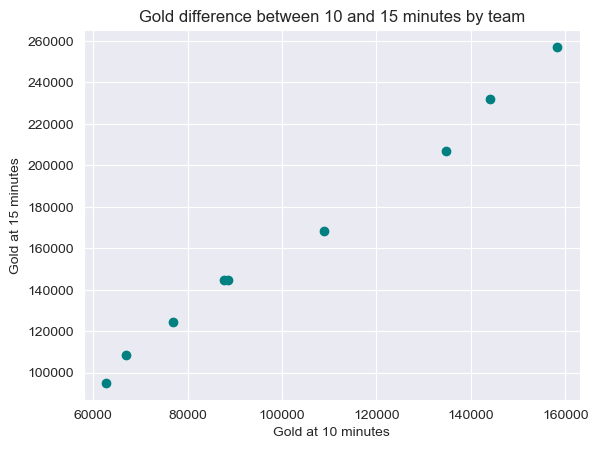

In [202]:
cmap = plt.cm.get_cmap('tab10')

plt.scatter(gold_diff_df['goldat10'], gold_diff_df['goldat15'], cmap=cmap)

# set axis labels and title
plt.xlabel('Gold at 10 minutes')
plt.ylabel('Gold at 15 minutes')
plt.title('Gold difference between 10 and 15 minutes by team')
# show plot
plt.show()